In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_typing',
 

In [9]:
df=pd.read_excel('crop.xlsx')

In [10]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [25]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [31]:
df['Temperatue'] = pd.to_numeric(df['Temperatue'], errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     float64
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(7)
memory usage: 6.1 KB


In [37]:
missing_values=df.isnull().sum()
print(missing_values)

Rain Fall (mm)    10
Fertilizer        10
Temperatue        10
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64


In [38]:
df=df.dropna()

In [39]:
missing_values=df.isnull().sum()
print(missing_values)

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64


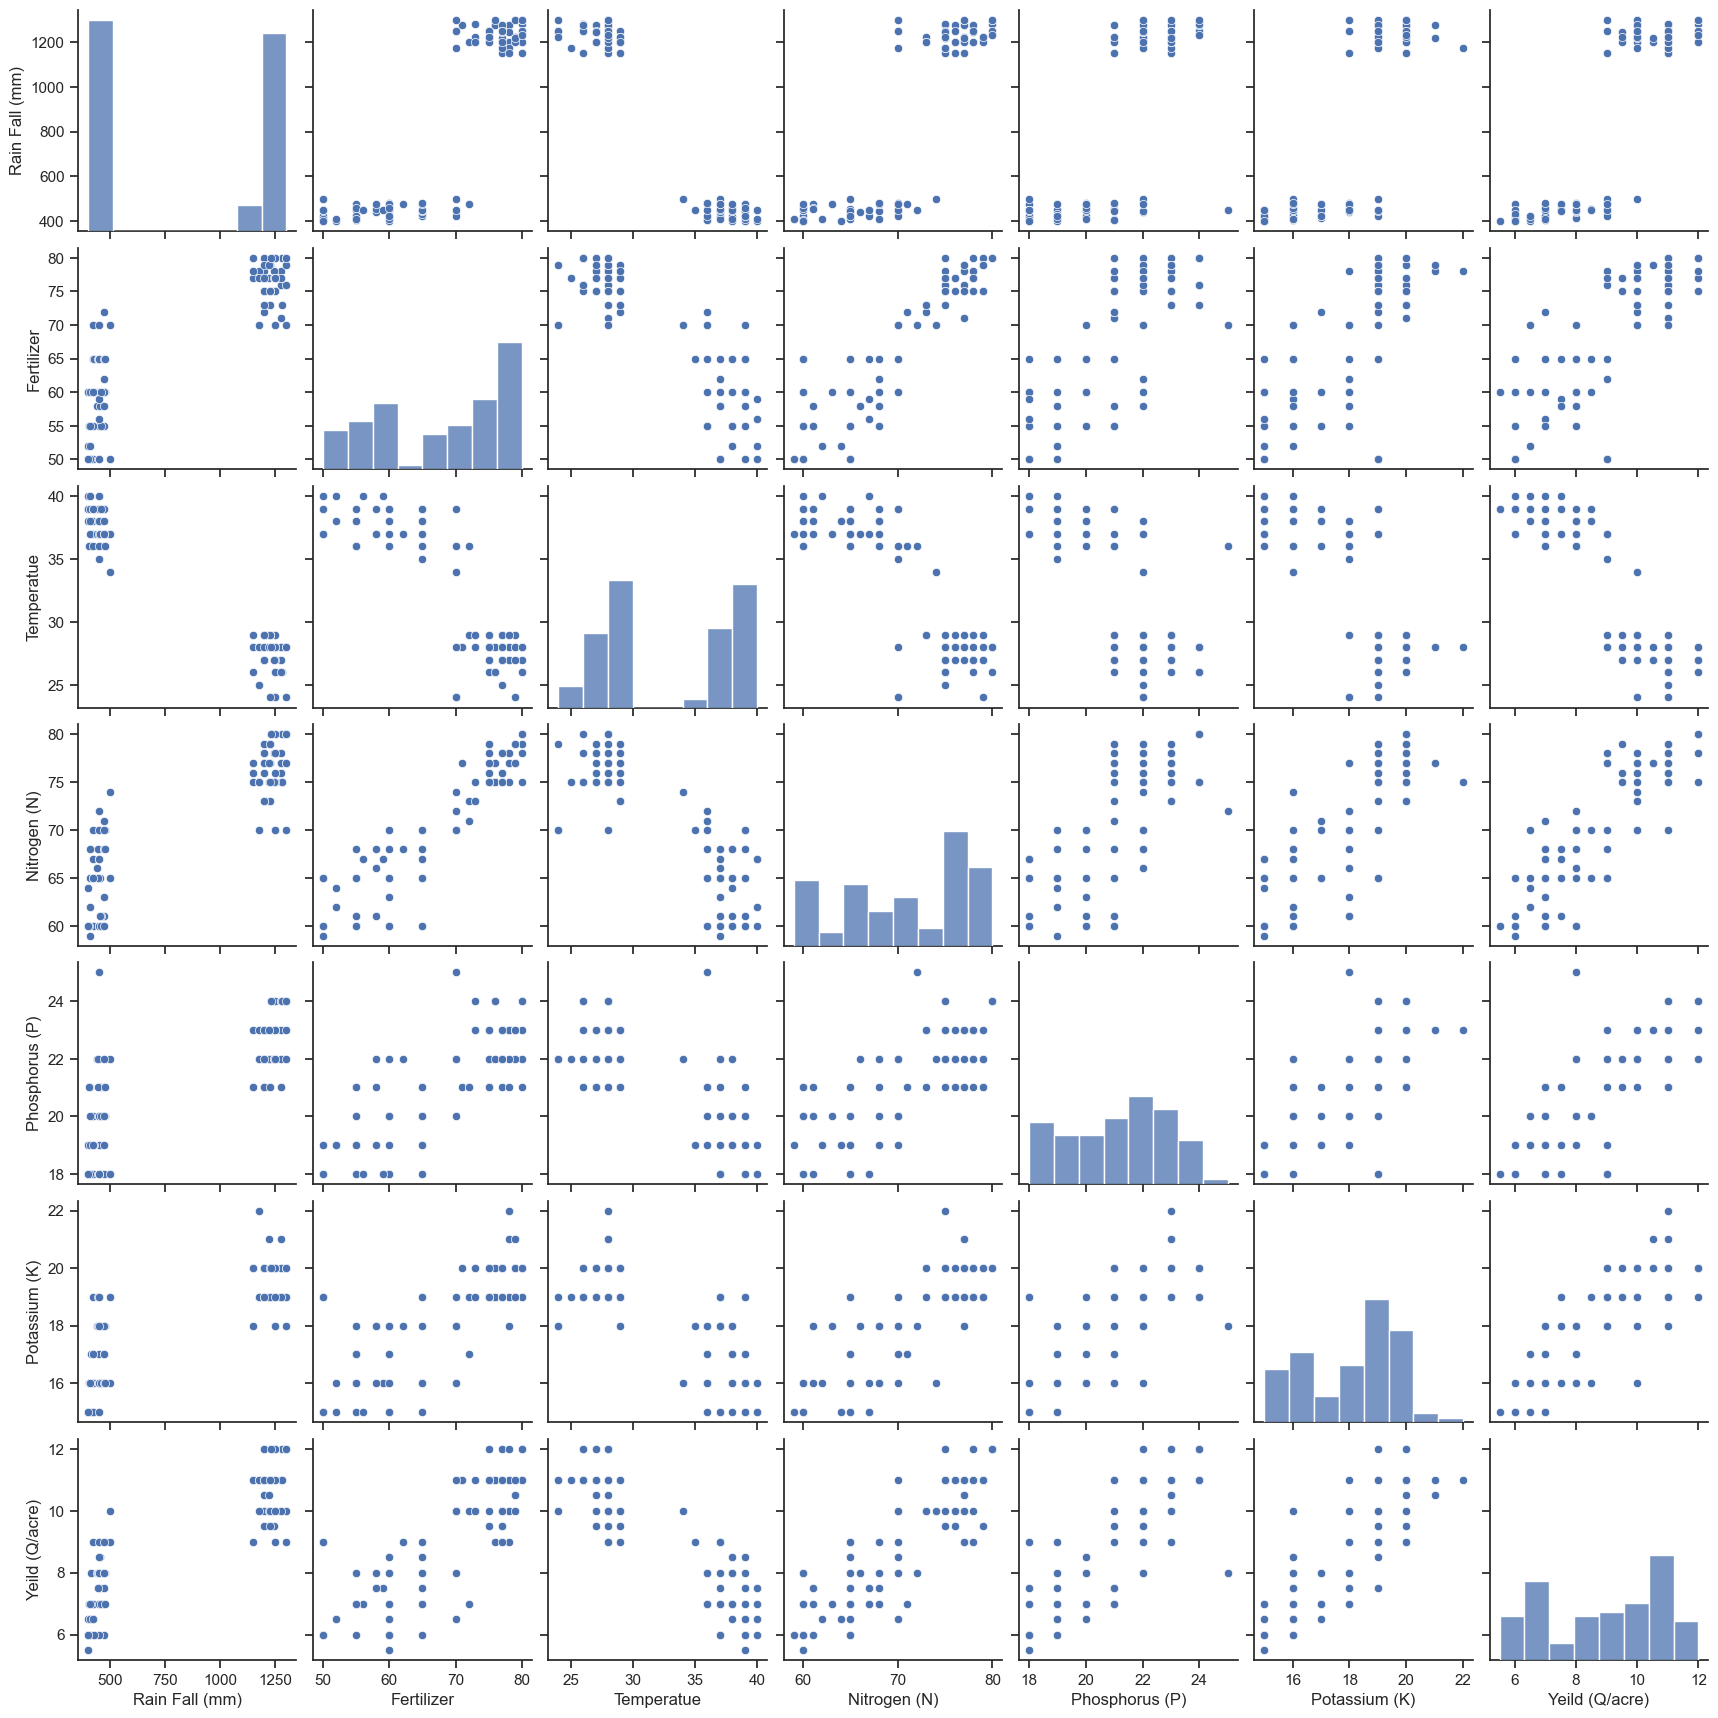

In [41]:
sns.pairplot(df)

<AxesSubplot:>

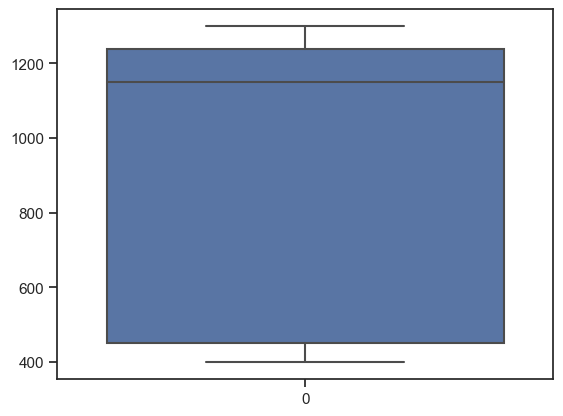

In [48]:
sns.boxplot(df['Rain Fall (mm)'])



<AxesSubplot:>

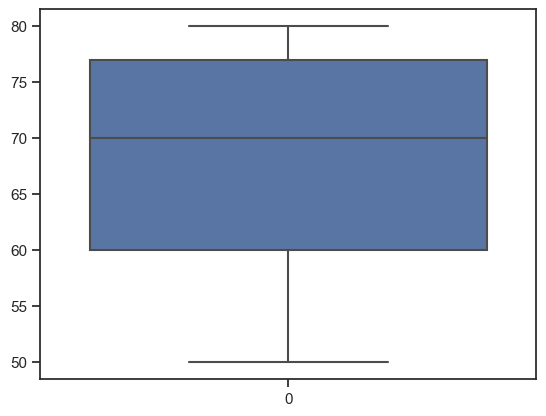

In [49]:
sns.boxplot(df['Fertilizer'])


<AxesSubplot:>

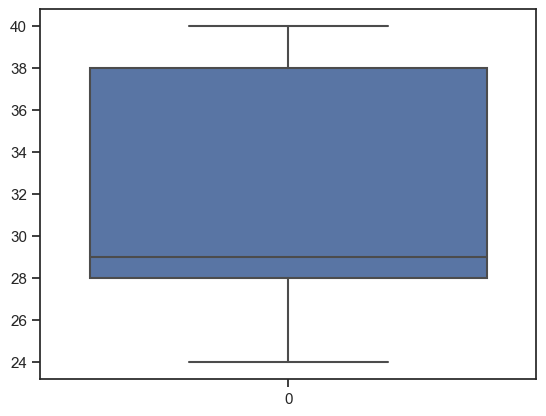

In [50]:
sns.boxplot(df['Temperatue'])


In [52]:
Q1 = df['Nitrogen (N)'].quantile(0.25)
Q3 = df['Nitrogen (N)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['Nitrogen (N)'] < Q1 - threshold * IQR) | (df['Nitrogen (N)'] > Q3 + threshold * IQR)]
print (outliers)

Empty DataFrame
Columns: [Rain Fall (mm), Fertilizer, Temperatue, Nitrogen (N), Phosphorus (P), Potassium (K), Yeild (Q/acre)]
Index: []


<AxesSubplot:>

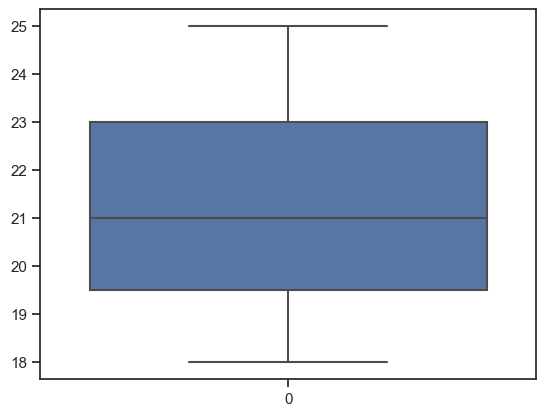

In [55]:
sns.boxplot(df['Phosphorus (P)'])


<AxesSubplot:>

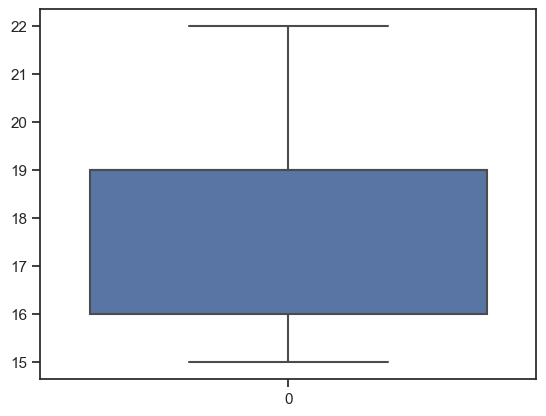

In [56]:
sns.boxplot(df['Potassium (K)'])


<AxesSubplot:>

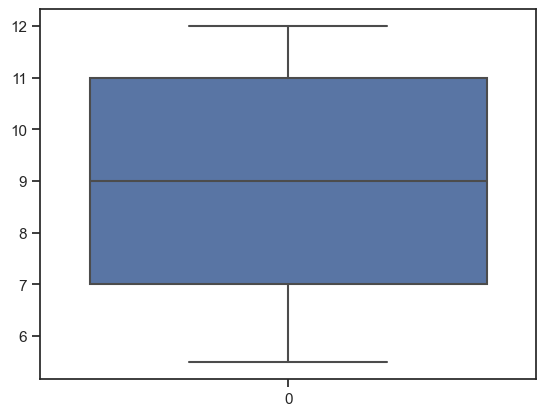

In [60]:
sns.boxplot(df['Yeild (Q/acre)'])


In [64]:
df.describe(include='all')

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,32.393939,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,5.426350,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,38.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [69]:
df.corr()
#correlation matrix

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.000000,0.890318,-0.967291,0.875808,0.776814,0.810893,0.886721
Fertilizer,0.890318,1.000000,-0.864742,0.909786,0.816710,0.762152,0.833823
Temperatue,-0.967291,-0.864742,1.000000,-0.846513,-0.780556,-0.779570,-0.892425
Nitrogen (N),0.875808,0.909786,-0.846513,1.000000,0.778651,0.808640,0.879056
Phosphorus (P),0.776814,0.816710,-0.780556,0.778651,1.000000,0.748642,0.800094
Potassium (K),0.810893,0.762152,-0.779570,0.808640,0.748642,1.000000,0.856010
Yeild (Q/acre),0.886721,0.833823,-0.892425,0.879056,0.800094,0.856010,1.000000


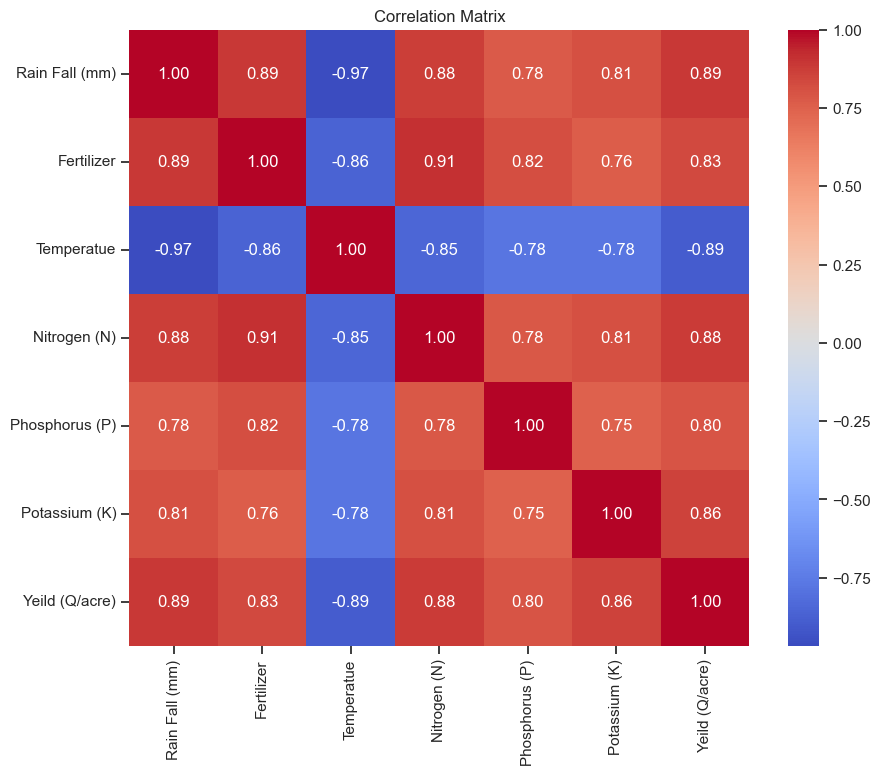

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [72]:
X = df.drop(columns=['Yeild (Q/acre)'])  # Features excluding the target variable
y = df['Yeild (Q/acre)']  # Target variable (crop yields)


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SVR model
svr = SVR(kernel='rbf', C=100, gamma='scale')  # You can adjust the kernel function and other hyperparameters as needed

# Train the SVR model
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared (R2) score:", r2)



Train RMSE: 0.40930673906225135
Test RMSE: 0.9610559023960573
R-squared (R2) score: 0.906043060149886


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared (R2) score:", r2)


Train RMSE: 0.6662863619324014
Test RMSE: 0.6632455410786812
R-squared (R2) score: 0.906043060149886


In [79]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

\\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Epoch 1/50
2/2 [==============================] - 1s 193ms/step - loss: 76.3022 - val_loss: 83.5269
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 75.5143 - val_loss: 80.6969
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 72.1718 - val_loss: 77.9738
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 68.6363 - val_loss: 75.2787
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 67.5631 - val_loss: 72.5765
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 63.3071 - val_loss: 69.8230
Epoch 7/50
2/2 [==============================] - 0s 24ms/step - loss: 61.0213 - val_loss: 66.9784
Epoch 8/50
2/2 [==============================] - 0s 29ms/step - loss: 58.0434 - val_loss: 64.0831
Epoch 9/50
2/2 [==============================] - 0s 29ms/step - loss: 55.9310 - val_loss: 61.0966
Epoch 10/50
2/2 [==============================] - 0s 24ms/step - loss: 53.0435 - val_loss: 58.0242
Epoch 11